<a href="https://colab.research.google.com/github/dsaliai/dsaliai/blob/main/Module10_4_Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files   #CODE CELL 1
uploaded = files.upload()

Saving ML_HW_Data_Patients.csv to ML_HW_Data_Patients.csv


In [ ]:
import pandas as pd  #CODE CELL 2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, lasso_path
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv('ML_HW_Data_Patients.csv')

# Clean Data
df_cleaned = df.dropna()

# ZScore on numeric predictors: Age, Height, Weight
scaler = StandardScaler()
df_cleaned[['Age', 'Height', 'Weight']] = scaler.fit_transform(df_cleaned[['Age', 'Height', 'Weight']])

In [ ]:
#CODE CELL 3
# dummy variables and drop one column from each categorical predictor
df_encoded = pd.get_dummies(df_cleaned, columns=['Gender', 'Location', 'SelfAssessedHealthStatus'], drop_first=True)

#  features and target
X = df_encoded.drop(['Systolic', 'LastName', 'Diastolic'], axis=1)
y = df_encoded['Systolic']

#  outliers
z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
X_filtered = X[filtered_entries]
y_filtered = y[filtered_entries]


In [ ]:
#CODE CELL4
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Train model using Lasso regression with 10-fold cross-validation
lasso = LassoCV(cv=10, random_state=0)
lasso.fit(X_train, y_train)

LassoCV(cv=10, random_state=0)

Text(0.5, 1.0, ' Importance using Lasso Model')

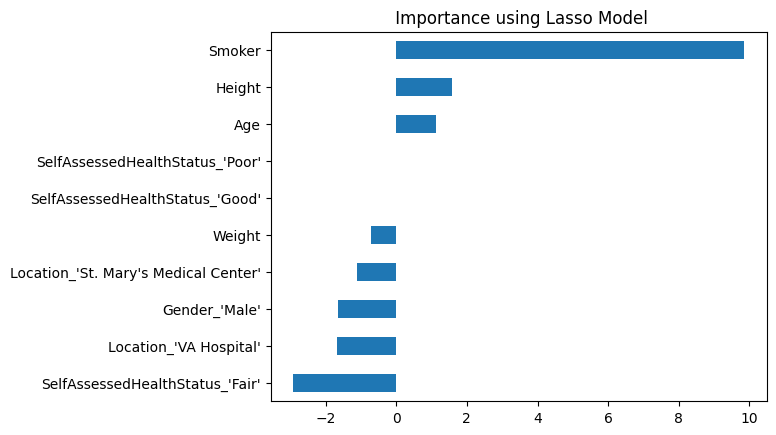

In [ ]:
#CODE CELL 5
# useful predictors
coefficients = pd.Series(lasso.coef_, index=X.columns)
sorted_coefficients = coefficients.sort_values()
sorted_coefficients.plot(kind="barh")
plt.title(" Importance using Lasso Model")

In [ ]:
#CODE CELL 6
#  Top two predictors
top_two_predictors = sorted_coefficients.index[-2:]
print("Top two predictors are:", top_two_predictors[0], "and", top_two_predictors[1])


lambda_value = lasso.alpha_
print("Lambda value:", lambda_value)

NameError: ignored

In [ ]:
#CODE CELL 7
#  q values for the two selected predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

q_values = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
q_values_top_two = [q_values[X_train.columns.get_loc(predictor)] for predictor in top_two_predictors]
print("Q value for", top_two_predictors[0], ":", q_values_top_two[0])
print("Q value for", top_two_predictors[1], ":", q_values_top_two[1])

Q value for Height : 2.2169849963896713
Q value for Smoker : 1.7615816290214381


In [ ]:
#CODE CELL 8
#  Predicting new data
y_pred = lasso.predict(X_test)

#  Evaluating performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R2 score:", r2)

RMSE: 5.727900233058252
R2 score: 0.2094255161477403


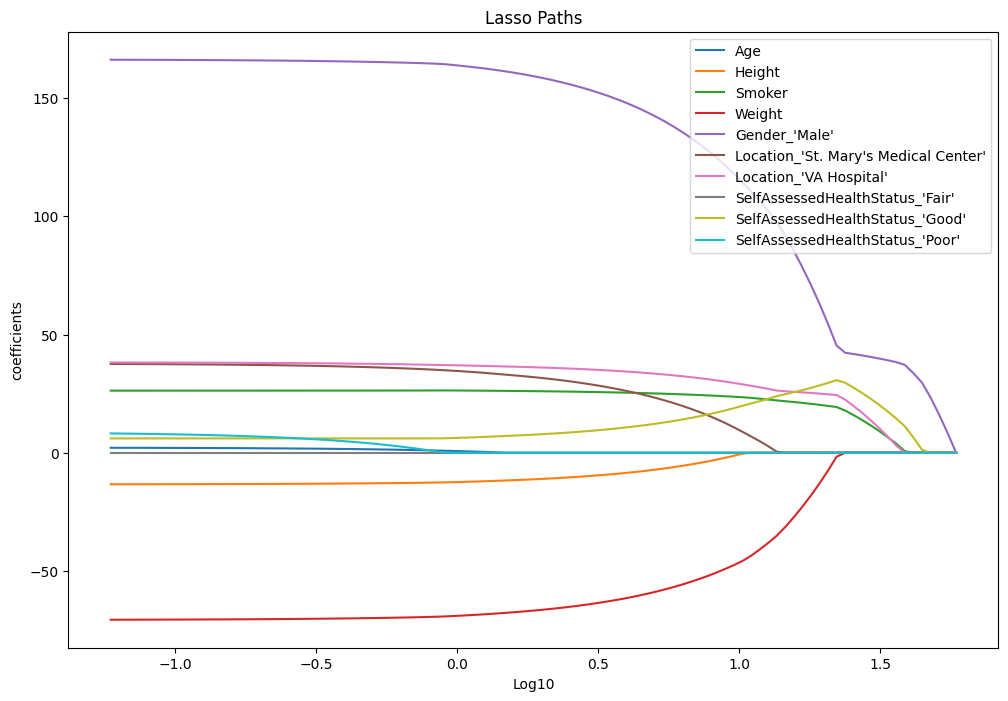

In [ ]:
#CODE CELL 9
# Lasso path plot
alphas_lasso, coefs_lasso, _ = lasso_path(X_train, y_train)

plt.figure(figsize=(12,8))
for i in range(len(coefs_lasso)):
    plt.plot(np.log10(alphas_lasso), coefs_lasso[i, :], label = X.columns[i])

plt.xlabel('Log10')
plt.ylabel('coefficients')
plt.title('Lasso Paths')
plt.legend()
plt.show()